<font color=#2dd4b8>Pymaceuticals Inc.</font>

Data Analysis Report on Mouse Drug Trials

<font color=#FF0000>1. Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen</font>

Analysis:

The bar chart depicts the number of data points (Mouse ID/Timepoints) associated with each drug regimen.

The drug regimens "Capomulin" and "Ramicane" appear to have the highest number of observations, both exceeding 200. This might suggest that they were used on more mice or were observed over a longer period.

The rest of the drug regimens, including "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin", and "Propriva", all have data points ranging between 150 to 200.</font>

<font color=#108ee9>2. Distribution of Female vs Male Mice</font>

Analysis:

The pie chart shows a nearly even distribution of male and female mice in the study.

Male mice comprise 51% of the population, while female mice represent 49%.

This near-even distribution ensures that the study considers potential gender-related effects on drug efficacy.

<font color=#2dd4b8>3. Final Tumor Volume Distribution by Treatment</font>

Analysis:

This box plot displays the distribution of final tumor volumes for mice treated with four drug regimens: "Capomulin", "Ramicane", "Infubinol", and "Ceftamin".

"Capomulin" and "Ramicane" treatments resulted in the smallest tumor sizes, indicating their potential effectiveness. The spread of tumor sizes is also relatively tight, suggesting consistent results.

"Infubinol" shows a similar median tumor volume to "Ceftamin", but there's an outlier in the lower range. This outlier suggests that "Infubinol" might have worked exceptionally well for at least one mouse.

"Ceftamin" has a slightly higher median tumor volume compared to the rest.

<font color=#800080>4. Ramicane treatment of mouse k403</font>

Analysis:

The line plot demonstrates the progression of tumor volume in mouse k403 over time when treated with "Ramicane".

Over the span of 45 days, there's a clear decline in tumor volume, dropping from 45 mm3 to below 25 mm3. This indicates the effectiveness of "Ramicane" in reducing tumor size for this particular mouse.

<font color=#FFA500>5. Mouse Weight vs Average Tumor Volume for Capomulin Regimen</font>

Analysis:

The scatter plot, coupled with the regression line, explores the relationship between mouse weight and average tumor volume for the "Capomulin" treatment.

There appears to be a positive correlation between mouse weight and average tumor volume. As the mouse weight increases, the average tumor volume also tends to rise.

The equation of the regression line is y=0.95x+21.55. This equation can be used to predict the average tumor volume based on a given mouse weight.

In Conclusion:

The data provides insights into the effectiveness of various drug regimens. 

Both "Capomulin" and "Ramicane" seem to exhibit potential in reducing tumor sizes. It's also evident that mouse weight can influence the average tumor volume, at least for the "Capomulin" regimen. 

Further investigation and statistical tests are recommended to validate these preliminary observations and identify the most promising treatments for future research.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(mouse_metadata.head())
print(study_results.head())


  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In [2]:
# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
print(f"Number of mice: {num_mice}")

Number of mice: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_data.loc[combined_data['Mouse ID'] == 'g989']
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data['Mouse ID'].nunique()
print(f"Number of mice: {num_mice_clean}")

Number of mice: 248


Summary Statistics


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group by Drug Regimen
drug_regimen_group = clean_data.groupby('Drug Regimen')

# Calculate mean, median, variance, standard deviation, and SEM of the tumor volume
tumor_volume_mean = drug_regimen_group['Tumor Volume (mm3)'].mean()
tumor_volume_median = drug_regimen_group['Tumor Volume (mm3)'].median()
tumor_volume_variance = drug_regimen_group['Tumor Volume (mm3)'].var()
tumor_volume_std = drug_regimen_group['Tumor Volume (mm3)'].std()
tumor_volume_sem = drug_regimen_group['Tumor Volume (mm3)'].sem()

# Create summary dataframe
summary_df = pd.DataFrame({"Mean": tumor_volume_mean,
                           "Median": tumor_volume_median,
                           "Variance": tumor_volume_variance,
                           "Standard Deviation": tumor_volume_std,
                           "SEM": tumor_volume_sem})
summary_df.head(10)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = drug_regimen_group['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])  
summary_df.head(10) 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar and Pie Charts

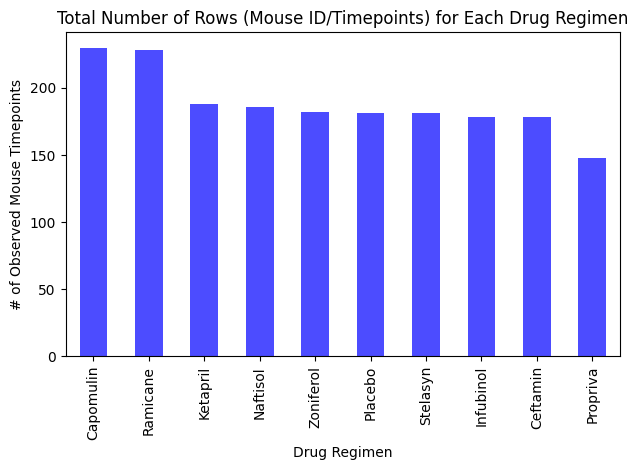

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group by Drug Regimen
drug_counts = clean_data['Drug Regimen'].value_counts()  # Count the number of mice per drug regimen

# Plot the counts using pandas
drug_counts.plot(kind='bar', color='blue', alpha=0.7)  # Create bar plot

plt.xlabel('Drug Regimen')  # Label x-axis
plt.ylabel('# of Observed Mouse Timepoints')  # Label y-axis
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')  # Add title
plt.tight_layout()  # Adjust layout 
plt.show()  # Show plot

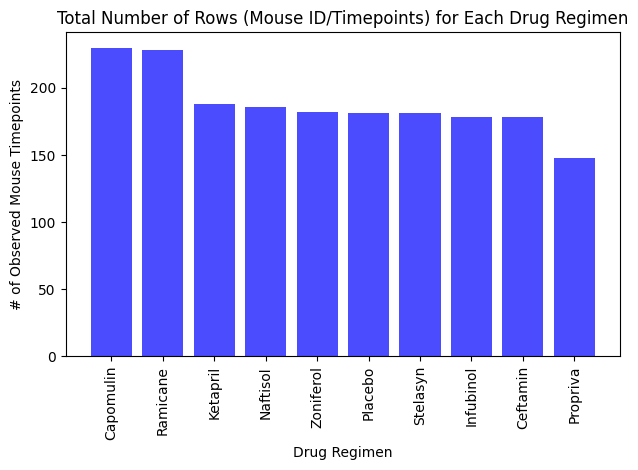

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Create x-axis
x_axis = drug_counts.index.values   # Get the drug regimen names

# Plot the counts using pyplot
plt.bar(x_axis, drug_counts, color='blue', alpha=0.7, align='center')   # Create bar plot

plt.xlabel('Drug Regimen')  # Label x-axis
plt.ylabel('# of Observed Mouse Timepoints')    # Label y-axis
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')   # Add title
plt.xticks(rotation=90) # Rotate x-axis labels
plt.tight_layout()  # Adjust layout
plt.show()  # Show plot

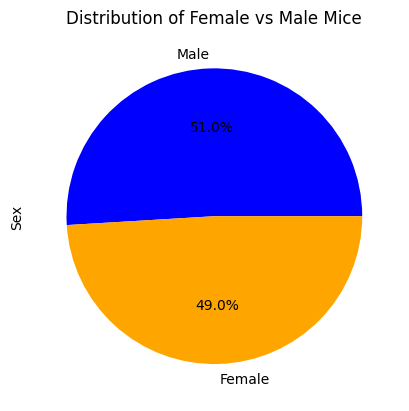

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_data['Sex'].value_counts()    

# Plotting
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], ylabel='Sex')    # Create pie plot
plt.title('Distribution of Female vs Male Mice')    # Add title
plt.show()  # Show plot

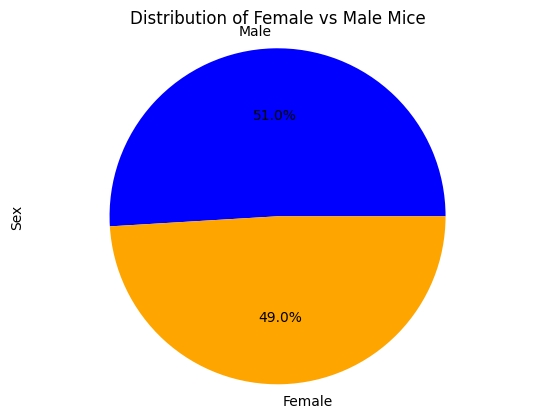

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = clean_data['Sex'].value_counts()  

# Plotting using Pyplot
labels = gender_distribution.index    
sizes = gender_distribution.values    
colors = ['blue', 'orange']  
explode = (0, 0)  # no explosion for this pie chart

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')    # Create pie plot
plt.ylabel('Sex')   # Label y-axis
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Female vs Male Mice')    # Add title
plt.show()  # Show plot

Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()  # Group by Mouse ID and get the max timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_data, last_timepoint, on=["Mouse ID", "Timepoint"])  # Merge on Mouse ID and Timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] # List of treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [] # List of tumor volumes

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:    # Loop through each treatment
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]   
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)  
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])  # Calculate quartiles
    lowerq = quartiles[0.25]    # Get lower quartile
    upperq = quartiles[0.75]    # Get upper quartile
    iqr = upperq-lowerq # Calculate IQR
    lower_bound = lowerq - (1.5*iqr)    # Calculate lower bound
    upper_bound = upperq + (1.5*iqr)    # Calculate upper bound
    outliers = final_tumor_vol[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]   # Get outliers
    print(f"{treatment}'s potential outliers: {outliers}")  # Print outliers

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


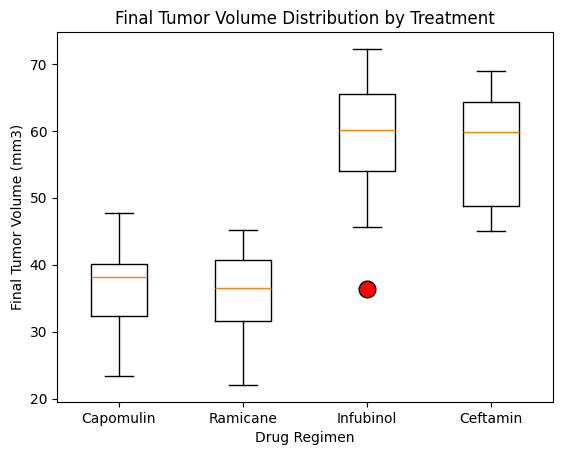

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none', markeredgecolor='black')  # Define outlier style

fig, ax = plt.subplots()    # Create boxplot
ax.boxplot(tumor_vol_data, flierprops=flierprops)  # Plot boxplot
ax.set_title('Final Tumor Volume Distribution by Treatment')    # Add title
ax.set_ylabel('Final Tumor Volume (mm3)')   # Label y-axis
ax.set_xlabel('Drug Regimen')   # Label x-axis   
ax.set_xticklabels(treatments)  # Add x-axis labels  
plt.show()  # Show plot

Line and Scatter Plots

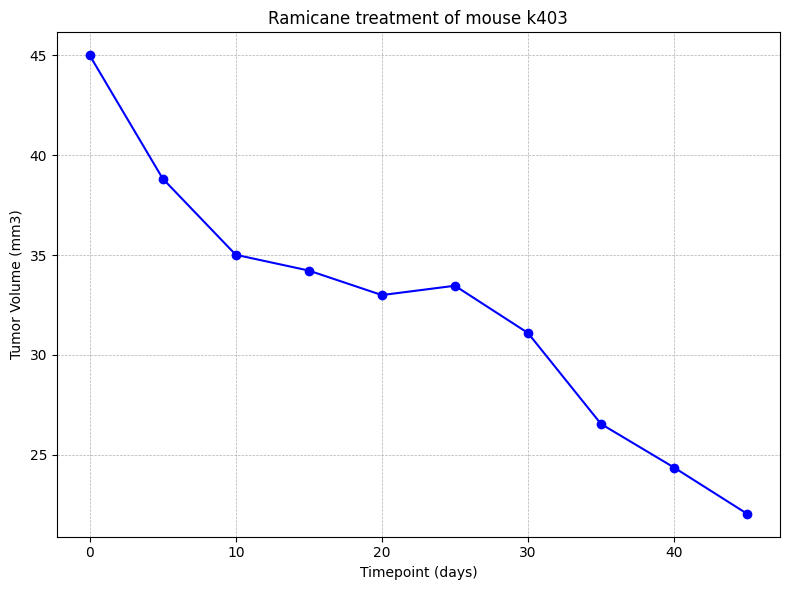

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'k403' # mouse id for mouse treated with Capomulin
mouse_data = clean_data[clean_data['Mouse ID'] == mouse_id]  # filter data for mouse id

plt.figure(figsize=(8, 6))  # set figure size
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], '-o', color='blue')  # plot line chart
plt.title(f'{mouse_data["Drug Regimen"].iloc[0]} treatment of mouse {mouse_id}')  # set title
plt.xlabel('Timepoint (days)')  # set x-axis label
plt.ylabel('Tumor Volume (mm3)')  # set y-axis label
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # add gridlines
plt.tight_layout()  # set layout
plt.show()  # show plot


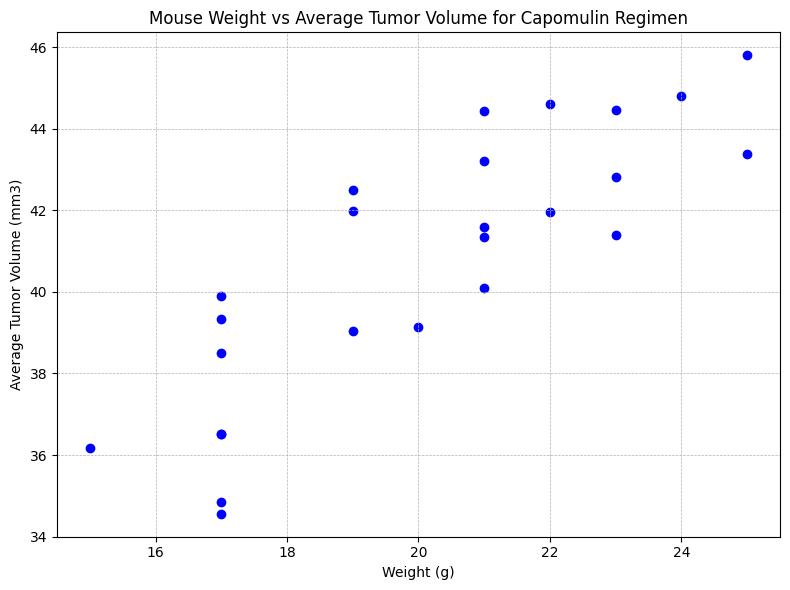

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == "Capomulin"]  # filter data for Capomulin regimen

# Calculate average tumor volume for each mouse. Here we are selecting only the numeric columns before applying the mean function.
capomulin_avg = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

plt.figure(figsize=(8, 6))  # set figure size
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'], color='blue')  # plot scatter chart
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Regimen')  # set title
plt.xlabel('Weight (g)')  # set x-axis label
plt.ylabel('Average Tumor Volume (mm3)')  # set y-axis label
plt.grid(True, linestyle='--', linewidth=0.5)  # add gridlines
plt.tight_layout()  # set tight layout
plt.show()  # show plot

Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


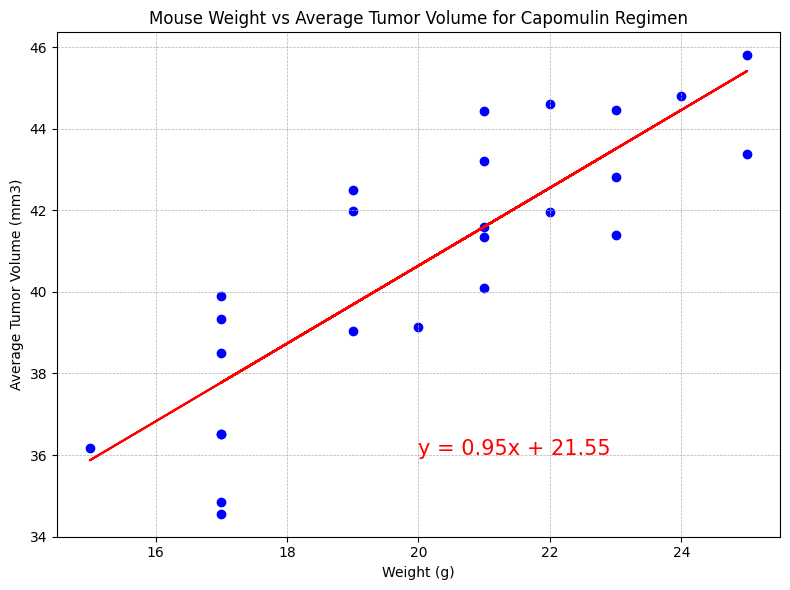

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = capomulin_avg['Weight (g)']  # set x values
y_values = capomulin_avg['Tumor Volume (mm3)']  # set y values

# Calculate correlation coefficient
correlation = st.pearsonr(x_values,y_values)    # calculate correlation coefficient
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")    # print correlation coefficient

# Calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)  # calculate linear regression model
regress_values = x_values * slope + intercept  # calculate regression values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))  # set line equation

# Plot linear regression model
plt.figure(figsize=(8, 6))  # set figure size
plt.scatter(x_values,y_values, color='blue')  # plot scatter chart
plt.plot(x_values,regress_values,"r-")  # plot regression line
plt.annotate(line_eq,(20,36),fontsize=15,color="red")  # add line equation
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Regimen')  # set title
plt.xlabel('Weight (g)')  # set x-axis label
plt.ylabel('Average Tumor Volume (mm3)')  # set y-axis label
plt.grid(True, linestyle='--', linewidth=0.5)  # add gridlines
plt.tight_layout()  # set tight layout
plt.show()  # show plot